# Computer Vision

## Lab 1


### Imports

- [x] OpenCV: computer vision library (import cv2)
- [x] NumPy: n-dimensional arrays and math (import numpy as np)
- [x] SciPy: scientific computing and stats (import scipy.stats)
- [x] SciKit-image: image processing and color conversion (import skimage)
- [ ] ImageIO: easy image/video reading/writing (import imageio)
- [x] mpmath: arbitrary precision floating point operations (import mpmath)
- [x] matplotlib: plotting (import matplotlib.pyplot as plt)
- [x] seaborn: matplotlib wrapper (import seaborn as sns)
- [x] Python Image Library: alternative image processing (import PIL)


In [75]:
# Imports
import os
import cv2
import numpy as np
import scipy.stats
import skimage
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from typing import Any, Callable


### Utils


In [76]:
ImageProcessingFunction = Callable[[Any, Any, int], None]


def mask_as_location_array(mask):
    return np.asarray(mask.convert(mode="1"))


def perform_function_on_image(func: ImageProcessingFunction, images: list[Any], masks: list[Any]):
    for image_name, mask_name, i in zip(images, masks, range(len(images))):
        with PIL.Image.open(f"./assets/{image_name}") as image, PIL.Image.open(f"./assets/{mask_name}") as mask:
            rgb_image = image.convert(mode="RGB")
            rgb_image.filename = image.filename

            rgb_mask = mask.convert(mode="RGB")
            rgb_mask.filename = mask.filename

            try:
                func(rgb_image, rgb_mask, i)
            except TypeError:
                try:
                    func(rgb_image, rgb_mask)
                except TypeError:
                    func(rgb_image)


### Section 2 - Define Images


In [77]:
# Images
image_35 = "image-35.jpg"
image_83 = "image-83.jpg"
image_110 = "image-110.jpg"

images = [image_35, image_83, image_110]
num_images = len(images)

# Masks
mask_35 = "mask-35.png"
mask_83 = "mask-83.png"
mask_110 = "mask-110.png"

masks = [mask_35, mask_83, mask_110]
num_masks = len(masks)

# All
all = images + masks


def perform_function_on_defaults(func):
    perform_function_on_image(func=func, images=images, masks=masks)


### Section 3 - Display Images


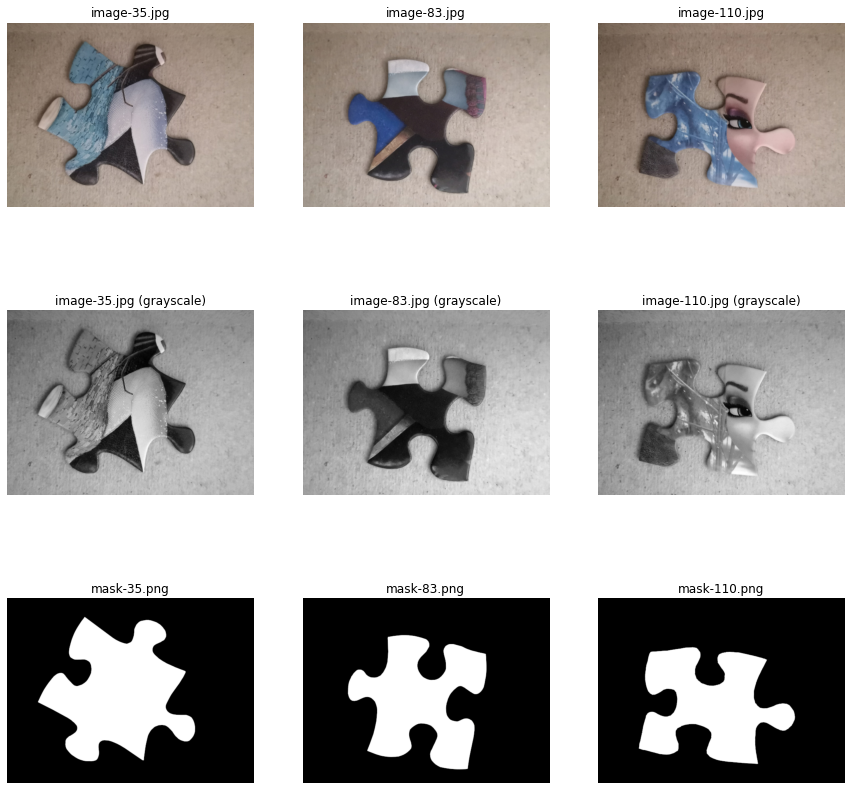

In [78]:
fig = plt.figure(figsize=(num_images * 5, 15))


def display_image(image, mask, i: int):
    image_name = os.path.basename(image.filename)
    mask_name = os.path.basename(mask.filename)

    fig.add_subplot(3, num_images, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_name)

    fig.add_subplot(3, num_images, num_images+i+1)
    grayscale = skimage.color.rgb2gray(image)
    plt.imshow(grayscale, cmap="gray")
    plt.axis('off')
    plt.title(image_name+" (grayscale)")

    fig.add_subplot(3, len(masks), 2*num_images+i+1)
    plt.imshow(mask)
    plt.axis('off')
    plt.title(mask_name)


perform_function_on_defaults(display_image)


### Section 4 - Descriptive Statistics


#### Questions 1, 2 & 3


In [79]:
def print_dimensions(image):
    name = os.path.basename(image.filename)
    print(name)

    print(f"1. {image.width} (width)")
    print(f"2. {image.height} (height)")
    print(f"3. {image.width * image.height} pixels")

    print()


perform_function_on_defaults(print_dimensions)


image-35.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-83.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-110.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels



#### Questions 4 & 5


In [80]:
def print_pixel_counts(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    mask_arr = np.asarray(mask.convert(mode="1"))
    unique, counts = np.unique(mask_arr, return_counts=True)

    counts_dict = dict(zip(unique, counts))

    print(f"4. {counts_dict[False]} black pixels")
    print(f"5. {counts_dict[True]} white pixels")

    print()


perform_function_on_defaults(print_pixel_counts)


image-35.jpg
4. 195470 black pixels
5. 74530 white pixels

image-83.jpg
4. 209682 black pixels
5. 60318 white pixels

image-110.jpg
4. 209196 black pixels
5. 60804 white pixels



#### Question 6 & 7


In [81]:
def print_min_max(image):
    name = os.path.basename(image.filename)
    print(name)

    grayscale = skimage.color.rgb2gray(image)

    print(f"6. {np.amin(grayscale)} (min)")
    print(f"7. {np.amax(grayscale)} (max)")

    print()


perform_function_on_defaults(print_min_max)


image-35.jpg
6. 0.08399686274509804 (min)
7. 0.8985443137254902 (max)

image-83.jpg
6. 0.10333686274509803 (min)
7. 0.8971980392156863 (max)

image-110.jpg
6. 0.05205882352941176 (min)
7. 0.8501392156862745 (max)



#### Question 8 & 9


In [82]:
def print_min_max_puzzle_bg(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    mask_arr = np.asarray(mask.convert(mode="1"))

    image_puzzle = image_arr[mask_arr == True]
    print(
        f"8. {np.amin(image_puzzle)} (min) and {np.amax(image_puzzle)} (max) - puzzle")

    image_bg = image_arr[mask_arr == False]
    print(f"9. {np.amin(image_bg)} (min) and {np.amax(image_bg)} (max) - background")

    print()


perform_function_on_defaults(print_min_max_puzzle_bg)


image-35.jpg
8. 0.08399686274509804 (min) and 0.8985443137254902 (max) - puzzle
9. 0.14756823529411764 (min) and 0.7937560784313724 (max) - background

image-83.jpg
8. 0.10333686274509803 (min) and 0.8971980392156863 (max) - puzzle
9. 0.18647843137254905 (min) and 0.8673949019607844 (max) - background

image-110.jpg
8. 0.05205882352941176 (min) and 0.8501392156862745 (max) - puzzle
9. 0.11280980392156864 (min) and 0.7903247058823529 (max) - background



#### Question 10


In [83]:
def mean_intensity(image):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    print(f"10. {np.mean(image_arr)} (mean)")

    print()


perform_function_on_defaults(mean_intensity)


image-35.jpg
10. 0.5384709828395062 (mean)

image-83.jpg
10. 0.5664833728249818 (mean)

image-110.jpg
10. 0.5367658629745824 (mean)



#### Question 11, 12, 13 & 14


In [84]:
def mean_intensity_puzzle_bg(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    mask_arr = np.asarray(mask.convert(mode="1"))

    image_puzzle = image_arr[mask_arr == True]
    image_bg = image_arr[mask_arr == False]

    print(f"11. {np.mean(image_puzzle)} (mean) - puzzle")
    print(f"12. {np.mean(image_bg)} (mean) - background")
    print(f"13. {np.var(image_puzzle)} (variance) - puzzle")
    print(f"14. {np.var(image_bg)} (variance) - background")

    print()


perform_function_on_defaults(mean_intensity_puzzle_bg)


image-35.jpg
11. 0.44184835546154594 (mean) - puzzle
12. 0.5753118505863695 (mean) - background
13. 0.03806606384291545 (variance) - puzzle
14. 0.00784590844729906 (variance) - background

image-83.jpg
11. 0.3251410136342743 (mean) - puzzle
12. 0.635908924000882 (mean) - background
13. 0.02979163158696951 (variance) - puzzle
14. 0.010540964523995569 (variance) - background

image-110.jpg
11. 0.462364174467366 (mean) - puzzle
12. 0.5583911343372892 (mean) - background
13. 0.027336018392854017 (variance) - puzzle
14. 0.008967652488759194 (variance) - background



#### Question 15, 16 & 17


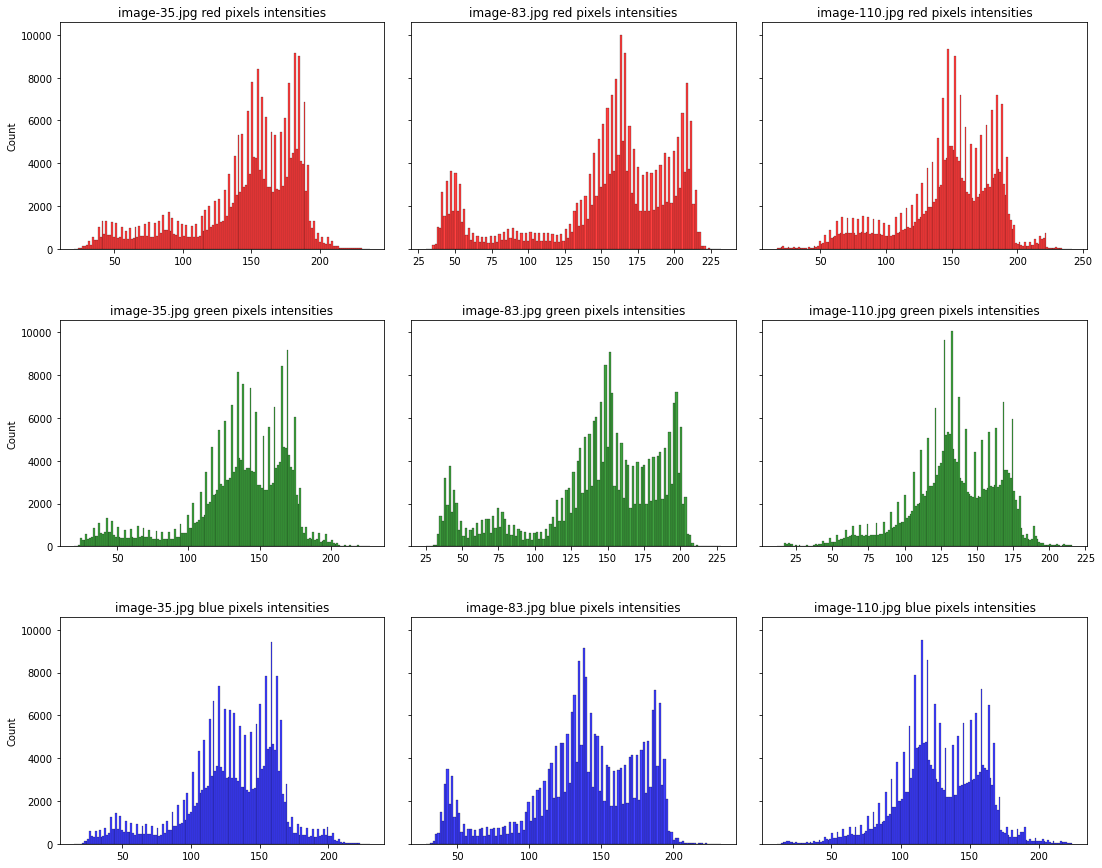

In [85]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_channel_histograms(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    red_pixels = image_arr[:, :, 0].flatten()
    sns.histplot(
        ax=axes[0, i],
        data=red_pixels,
        color="r"
    ).set(
        title=f"{name} red pixels intensities"
    )

    green_pixels = image_arr[:, :, 1].flatten()
    sns.histplot(
        ax=axes[1, i],
        data=green_pixels,
        color="g"
    ).set(
        title=f"{name} green pixels intensities"
    )

    blue_pixels = image_arr[:, :, 2].flatten()
    sns.histplot(
        ax=axes[2, i],
        data=blue_pixels,
        color="b"
    ).set(
        title=f"{name} blue pixels intensities"
    )


perform_function_on_defaults(display_channel_histograms)


#### Question 18


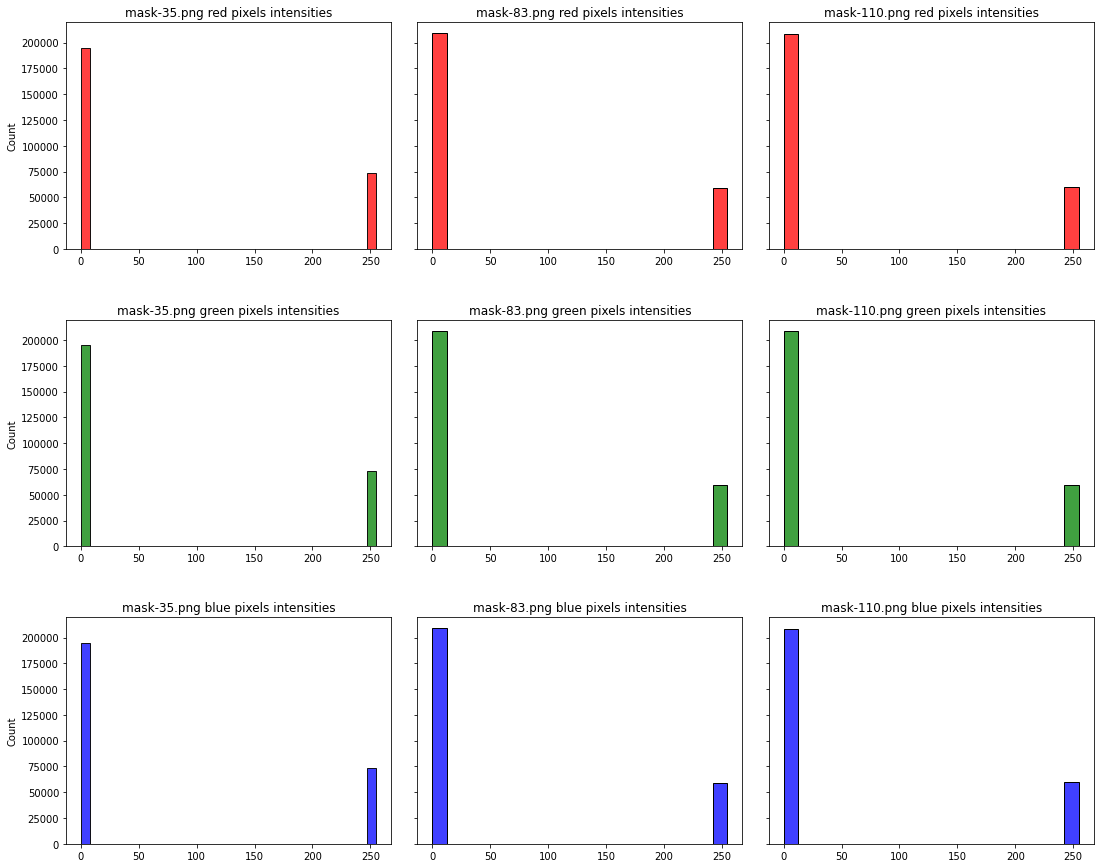

In [86]:
fig, axes = plt.subplots(3, num_masks, sharey=True)

fig.set_figwidth(5 * num_masks)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_mask_channel_histograms(_image, mask, i):
    name = os.path.basename(mask.filename)
    mask_arr = np.asarray(mask)

    red_pixels = mask_arr[:, :, 0].flatten()
    sns.histplot(
        ax=axes[0, i],
        data=red_pixels,
        color="r"
    ).set(
        title=f"{name} red pixels intensities"
    )

    green_pixels = mask_arr[:, :, 1].flatten()
    sns.histplot(
        ax=axes[1, i],
        data=green_pixels,
        color="g"
    ).set(
        title=f"{name} green pixels intensities"
    )

    blue_pixels = mask_arr[:, :, 2].flatten()
    sns.histplot(
        ax=axes[2, i],
        data=blue_pixels,
        color="b"
    ).set(
        title=f"{name} blue pixels intensities"
    )


perform_function_on_defaults(display_mask_channel_histograms)


#### Question 19, 20 & 21


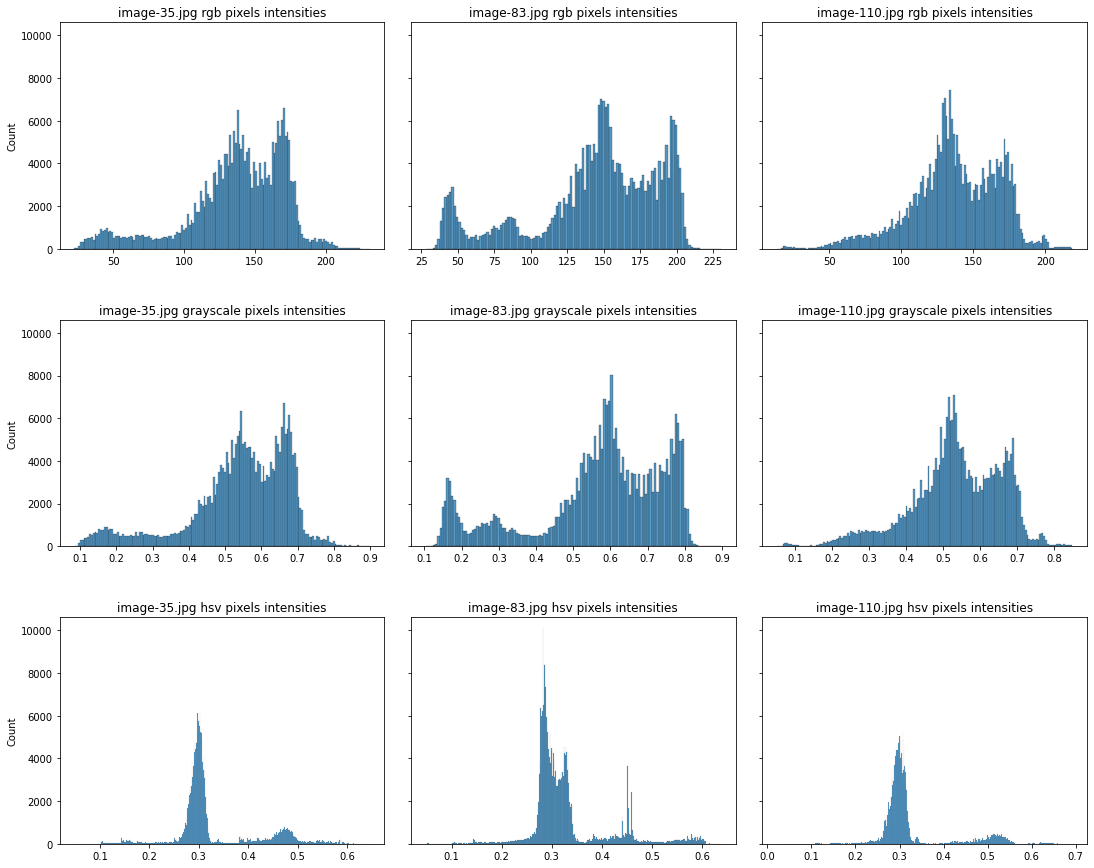

In [87]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_pixel_intensity_histograms(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    image_intensities = np.mean(image_arr, 2).flatten()
    sns.histplot(
        ax=axes[0, i],
        data=image_intensities
    ).set(
        title=f"{name} rgb pixels intensities"
    )

    grayscale = skimage.color.rgb2gray(image_arr)
    grayscale_arr = np.asarray(grayscale).flatten()
    sns.histplot(
        ax=axes[1, i],
        data=grayscale_arr
    ).set(
        title=f"{name} grayscale pixels intensities"
    )

    hsv = skimage.color.rgb2hsv(image_arr)
    hsv_arr = np.mean(hsv, 2).flatten()
    sns.histplot(
        ax=axes[2, i],
        data=hsv_arr
    ).set(
        title=f"{name} hsv pixels intensities"
    )


perform_function_on_defaults(display_pixel_intensity_histograms)


#### Question 22


### Section 5 - Bonus


#### Question 1


In [88]:
def contrast_stretch(image):
    name = os.path.basename(image.filename)

    image_arr = np.asarray(image)
    print(image_arr)


perform_function_on_defaults(contrast_stretch)


[[[113  95  81]
  [113  95  81]
  [111  93  79]
  ...
  [146 128 108]
  [147 129 109]
  [149 131 111]]

 [[114  96  82]
  [114  96  82]
  [110  92  78]
  ...
  [146 128 108]
  [148 130 110]
  [152 134 114]]

 [[116  98  84]
  [116  98  84]
  [112  94  80]
  ...
  [149 131 111]
  [151 133 113]
  [153 135 115]]

 ...

 [[148 137 119]
  [149 138 120]
  [151 140 122]
  ...
  [175 162 153]
  [176 163 154]
  [178 165 156]]

 [[147 134 117]
  [147 134 117]
  [151 140 122]
  ...
  [173 160 151]
  [172 159 150]
  [173 163 153]]

 [[147 134 117]
  [146 133 116]
  [150 139 121]
  ...
  [173 160 151]
  [172 159 150]
  [172 162 152]]]
[[[130 114  98]
  [129 113  97]
  [127 111  96]
  ...
  [159 145 132]
  [161 147 134]
  [163 149 136]]

 [[129 113  97]
  [129 113  97]
  [127 111  96]
  ...
  [161 147 134]
  [163 149 136]
  [165 151 138]]

 [[131 115  99]
  [131 115  99]
  [128 112  96]
  ...
  [164 150 137]
  [165 152 136]
  [166 153 137]]

 ...

 [[159 149 139]
  [160 150 140]
  [160 150 140]
  ..